In [1]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')

In [2]:
df = pd.read_csv("/kaggle/input/images-of-the-large-group-of-head-and-neck/RADCURE-patient-id-to-OPC-Radiomics-patient-id-mapping.csv")
df.head()

,RADCURE,OPC-Radiomics
0,RADCURE-0005,OPC-00001
1,RADCURE-0010,OPC-00002
2,RADCURE-0012,OPC-00003
3,RADCURE-0017,OPC-00004
4,RADCURE-0019,OPC-00005


In [3]:
clinic_df = pd.read_excel('/kaggle/input/images-of-the-large-group-of-head-and-neck/RADCURE-DA-CLINICAL-2.xlsx')
clinic_df.head()

,patient_id,Age,Sex,ECOG PS,Smoking PY,Smoking Status,Ds Site,Subsite,T,N,...,Local,Date Local,Regional,Date Regional,Distant,Date Distant,2nd Ca,Date 2nd Ca,RADCURE-challenge,ContrastEnhanced
0,RADCURE-0005,62.6,Female,ECOG 0,50,Ex-smoker,Oropharynx,post wall,T4b,N2c,...,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,0,0
1,RADCURE-0006,87.3,Male,ECOG 2,25,Ex-smoker,Larynx,Glottis,T1b,N0,...,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,0,1
2,RADCURE-0007,49.9,Male,ECOG 1,15,Ex-smoker,Oropharynx,Tonsil,T3,N2b,...,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,0,1
3,RADCURE-0009,72.3,Male,ECOG 1,30,Ex-smoker,Unknown,NaN,T0,N2c,...,NaN,NaT,NaN,NaT,NaN,NaT,S (suspicious),2008-05-27,0,0
4,RADCURE-0010,59.7,Female,ECOG 0,0,Non-smoker,Oropharynx,Tonsillar Fossa,T4b,N0,...,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,0,0


In [4]:
clinic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3346 entries, 0 to 3345
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   patient_id         3346 non-null   object        
 1   Age                3346 non-null   float64       
 2   Sex                3346 non-null   object        
 3   ECOG PS            3345 non-null   object        
 4   Smoking PY         3341 non-null   object        
 5   Smoking Status     3346 non-null   object        
 6   Ds Site            3346 non-null   object        
 7   Subsite            2972 non-null   object        
 8   T                  3334 non-null   object        
 9   N                  3333 non-null   object        
 10  M                  3332 non-null   object        
 11  Stage              3319 non-null   object        
 12  Path               3346 non-null   object        
 13  HPV                1717 non-null   object        
 14  Tx Modal

In [6]:
date_columns = ['RT Start', 'Last FU', 'Date of Death', 'Date Local', 'Date Regional', 'Date Distant', 'Date 2nd Ca']
clinic_df[date_columns] = clinic_df[date_columns].apply(pd.to_datetime, errors='coerce')

In [7]:
clinic_df.isnull().sum()

patient_id              0
Age                     0
Sex                     0
ECOG PS                 1
Smoking PY              5
Smoking Status          0
Ds Site                 0
Subsite               374
T                      12
N                      13
M                      14
Stage                  27
Path                    0
HPV                  1629
Tx Modality             0
Chemo?                  0
RT Start                0
Dose                    0
Fx                      0
Last FU                 0
Status                  0
Length FU               0
Date of Death        2288
Cause of Death       2294
Local                2966
Date Local           2966
Regional             3157
Date Regional        3157
Distant              2933
Date Distant         2933
2nd Ca               2905
Date 2nd Ca          2907
RADCURE-challenge       0
ContrastEnhanced        0
dtype: int64

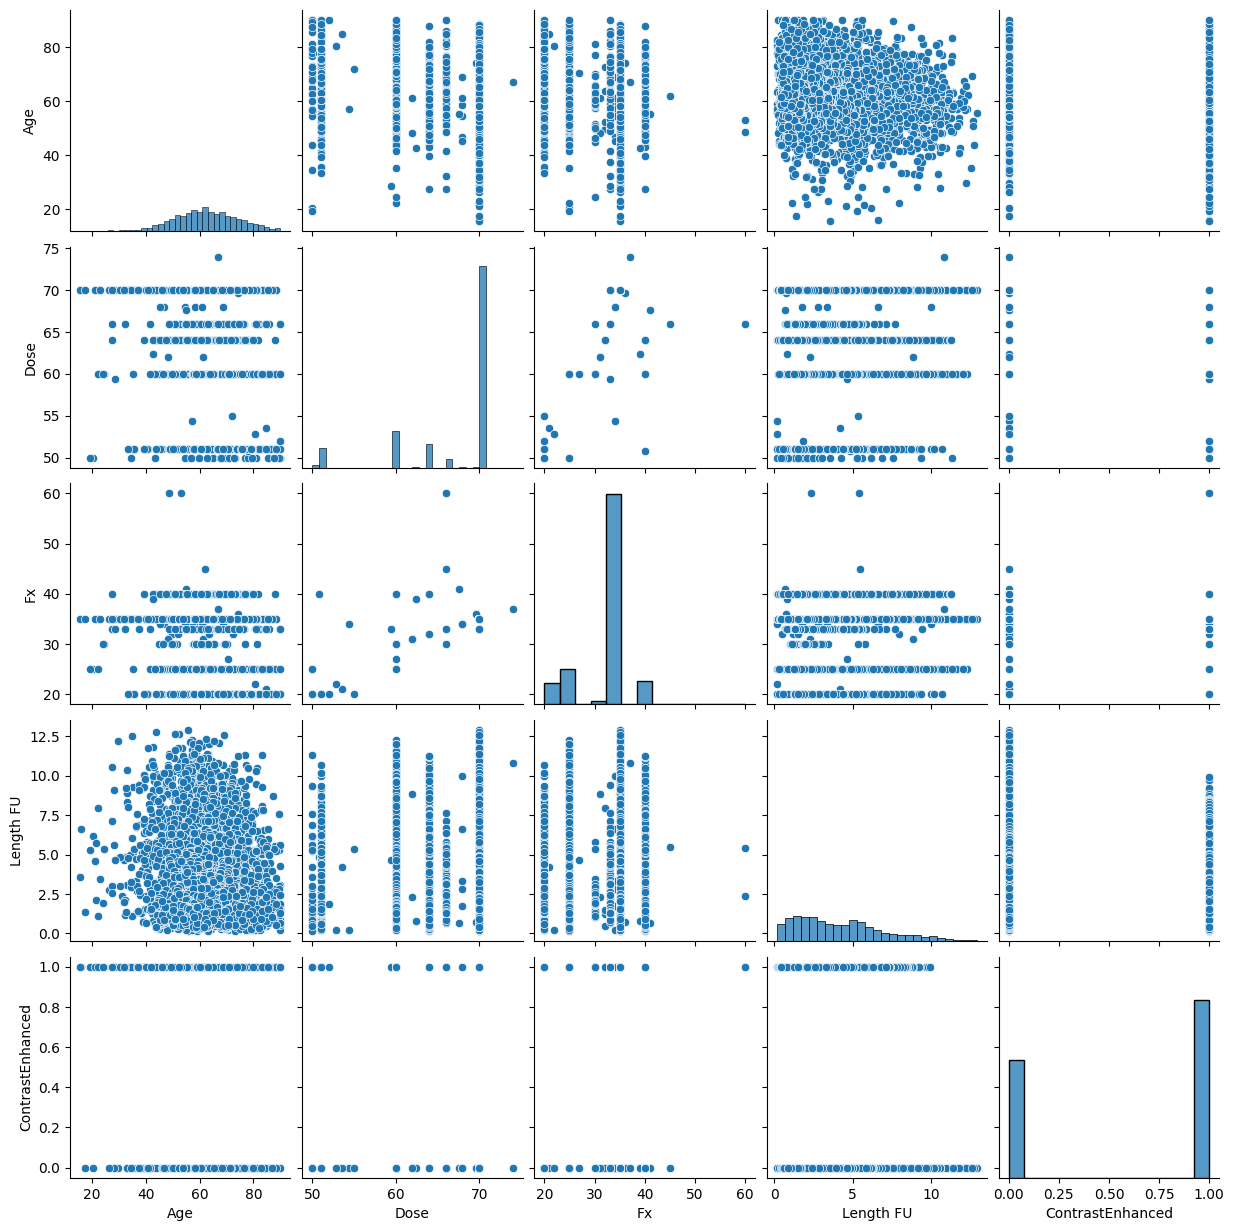

In [9]:
import seaborn as sns
sns.pairplot(clinic_df)

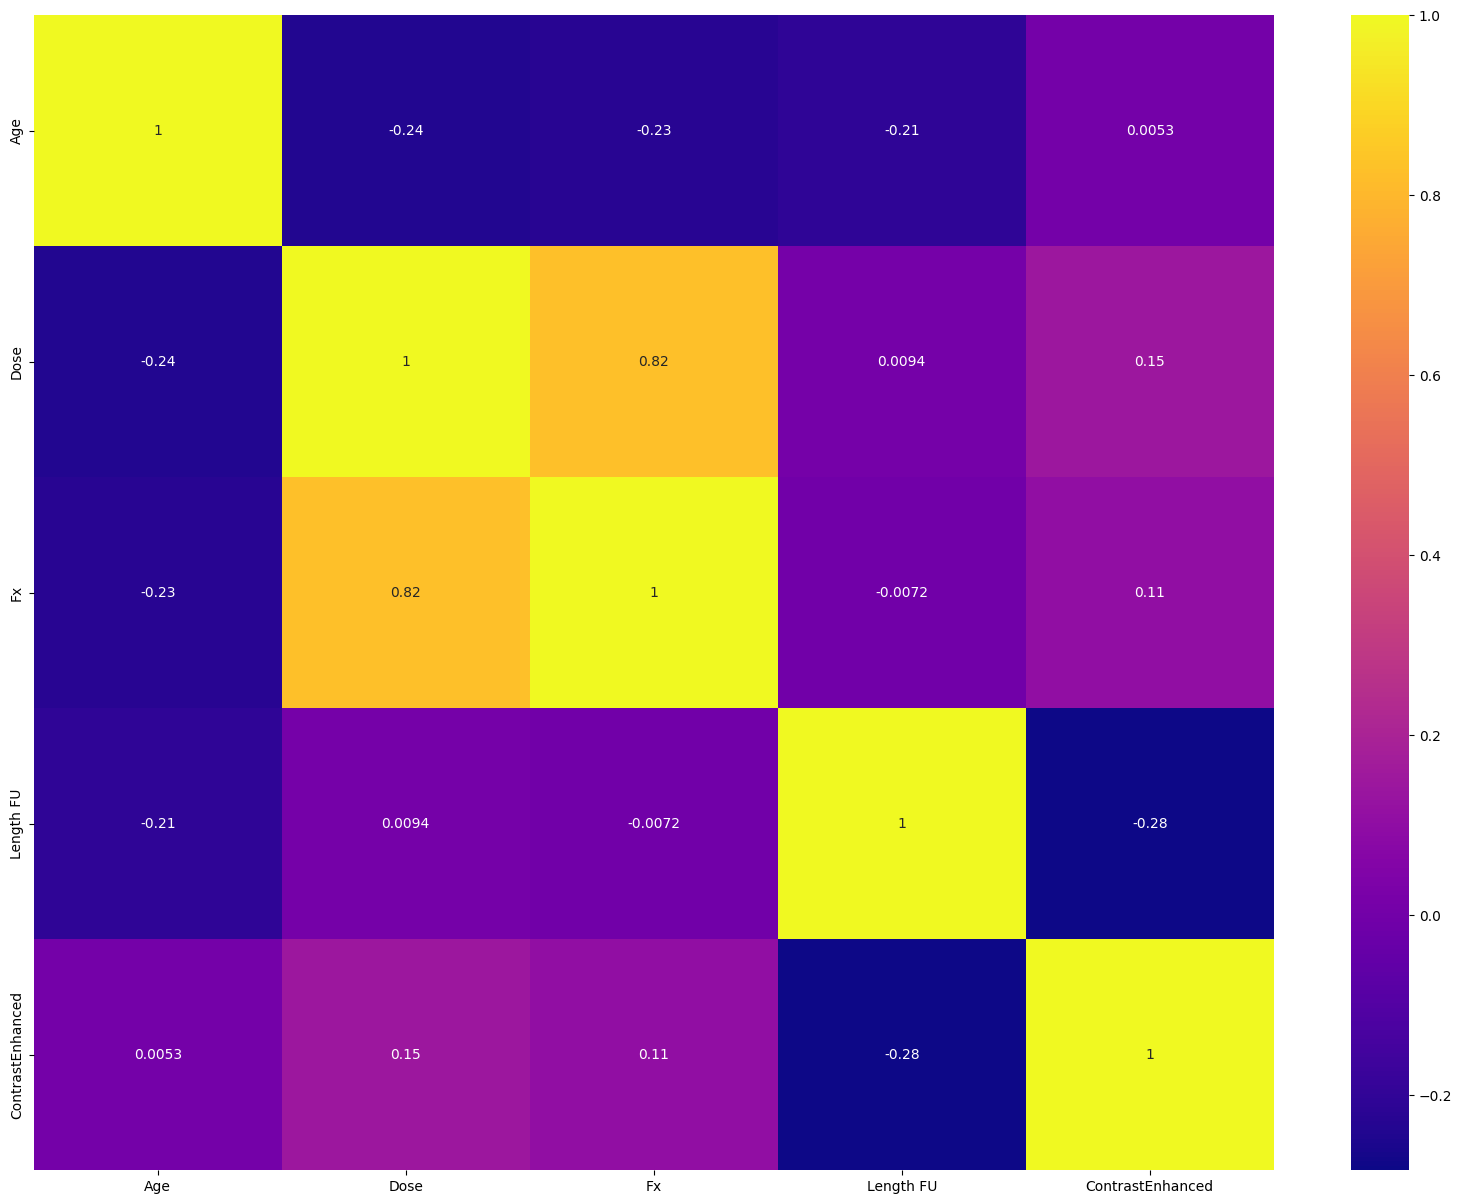

In [12]:
import matplotlib.pyplot as plt
#select numeric data for plotting
numplot = clinic_df.select_dtypes(include=[np.number])
plt.figure(figsize = (20,15))
sns.heatmap(numplot.corr(),annot=True, cmap='plasma')
plt.show()

In [13]:
from sklearn.preprocessing import LabelEncoder
# Create a LabelEncoder object
le = LabelEncoder()

# Fit and transform the 'Device Model' column
clinic_df['Status'] = le.fit_transform(clinic_df['Status'])

clinic_df = pd.get_dummies(clinic_df, columns=['Status'], drop_first=True)

clinic_df.head()

,patient_id,Age,Sex,ECOG PS,Smoking PY,Smoking Status,Ds Site,Subsite,T,N,...,Date Local,Regional,Date Regional,Distant,Date Distant,2nd Ca,Date 2nd Ca,RADCURE-challenge,ContrastEnhanced,Status_1
0,RADCURE-0005,62.6,Female,ECOG 0,50,Ex-smoker,Oropharynx,post wall,T4b,N2c,...,NaT,NaN,NaT,NaN,NaT,NaN,NaT,0,0,True
1,RADCURE-0006,87.3,Male,ECOG 2,25,Ex-smoker,Larynx,Glottis,T1b,N0,...,NaT,NaN,NaT,NaN,NaT,NaN,NaT,0,1,True
2,RADCURE-0007,49.9,Male,ECOG 1,15,Ex-smoker,Oropharynx,Tonsil,T3,N2b,...,NaT,NaN,NaT,NaN,NaT,NaN,NaT,0,1,False
3,RADCURE-0009,72.3,Male,ECOG 1,30,Ex-smoker,Unknown,NaN,T0,N2c,...,NaT,NaN,NaT,NaN,NaT,S (suspicious),2008-05-27,0,0,False
4,RADCURE-0010,59.7,Female,ECOG 0,0,Non-smoker,Oropharynx,Tonsillar Fossa,T4b,N0,...,NaT,NaN,NaT,NaN,NaT,NaN,NaT,0,0,False


In [17]:
clinic_df.columns

Index(['patient_id', 'Age', 'Sex', 'ECOG PS', 'Smoking PY', 'Smoking Status',
       'Ds Site', 'Subsite', 'T', 'N', 'M ', 'Stage', 'Path', 'HPV',
       'Tx Modality', 'Chemo? ', 'RT Start', 'Dose', 'Fx', 'Last FU',
       'Length FU', 'Date of Death', 'Cause of Death', 'Local', 'Date Local',
       'Regional', 'Date Regional', 'Distant', 'Date Distant', '2nd Ca',
       'Date 2nd Ca', 'RADCURE-challenge', 'ContrastEnhanced', 'Status_1'],
      dtype='object')

In [94]:
from sklearn.model_selection import train_test_split
X = numplot.drop('Length FU', axis = 1)
y = clinic_df['Status_1']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 50)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1673, 4)
X_test shape: (1673, 4)
y_train shape: (1673,)
y_test shape: (1673,)


In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#Model1
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

#Predictions
y_pred = log_reg.predict(X_test)

#Evaluation
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy : 0.7172743574417214
Confusion Matrix:
 [[1052  111]
 [ 362  148]]
Classification Report:
               precision    recall  f1-score   support

       False       0.74      0.90      0.82      1163
        True       0.57      0.29      0.38       510

    accuracy                           0.72      1673
   macro avg       0.66      0.60      0.60      1673
weighted avg       0.69      0.72      0.68      1673



In [96]:
#Model 2 : Lasso

from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

In [97]:
# Create a Lasso regression model with a specific alpha value (hyperparameter)
lasso_model = Lasso(alpha=0.3)  # Adjust alpha as needed

# Train the model on the training data
lasso_model.fit(X_train, y_train)

Lasso(alpha=0.3)

In [98]:
# Make predictions on the test set
y_pred = lasso_model.predict(X_test)

In [99]:
# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.20321014731349468


In [100]:
from sklearn.ensemble import RandomForestClassifier

# Model 3 : RF
rf_model = RandomForestClassifier(n_estimators=10, random_state=80)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6443514644351465
Confusion Matrix:
 [[892 271]
 [324 186]]
Classification Report:
               precision    recall  f1-score   support

       False       0.73      0.77      0.75      1163
        True       0.41      0.36      0.38       510

    accuracy                           0.64      1673
   macro avg       0.57      0.57      0.57      1673
weighted avg       0.63      0.64      0.64      1673



In [101]:
from sklearn.svm import SVC

# Model 4 : SVM"
svm_model = SVC(kernel='linear', probability=True)
svm_model.fit(X_train, y_train)

# Predictions
y_pred = svm_model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6909742976688583
Confusion Matrix:
 [[1085   78]
 [ 439   71]]
Classification Report:
               precision    recall  f1-score   support

       False       0.71      0.93      0.81      1163
        True       0.48      0.14      0.22       510

    accuracy                           0.69      1673
   macro avg       0.59      0.54      0.51      1673
weighted avg       0.64      0.69      0.63      1673



In [102]:
# Model 5 : Naive Bayes"
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Create a Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Train the model on the training data
gnb.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = gnb.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7106993424985056
